In [1]:
DF_PATH       = "../data/processed/1_preprocessed_df.pkl"
FEATURES_PATH = "../data/processed/features_skills_clusters.pkl"

ROLE_COLS      = ['DevType']
TECH_COLS      = ['DatabaseWorkedWith',
                  'LanguageWorkedWith',
                  # 'NEWCollabToolsWorkedWith',
                  'PlatformWorkedWith',
                  'MiscTechWorkedWith',
                  'WebframeWorkedWith']
#SYST_COLS      = ['OpSys']

EXPORT_PATH    = "../data/processed/2_cleaned_data.pkl"

In [2]:
# Load packages
import pandas as pd 
import numpy as np
import pickle

import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

***
<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> Read data and preprocess </span></h3>

In [3]:
# Read Data 
processed_df = pd.read_pickle(DF_PATH)
features_df = pd.read_pickle(FEATURES_PATH)

In [4]:
# One hot encode
encoded_dfs = {}
for col in ROLE_COLS + TECH_COLS:
    binarizer = MultiLabelBinarizer()
    encoded_df = pd.DataFrame(binarizer.fit_transform(processed_df[col]),
                               columns=binarizer.classes_,
                               index=processed_df[col].index)
    encoded_dfs[col] = encoded_df

# Merge 1-hot encoded
encoded_dfs = pd.concat(encoded_dfs, axis=1)

In [5]:
encoded_dfs

DevType                           \
      Academic researcher Data or business analyst   
0                       0                        0   
1                       0                        0   
2                       0                        0   
3                       0                        0   
4                       0                        0   
...                   ...                      ...   
64456                   0                        0   
64457                   0                        0   
64458                   0                        0   
64459                   0                        0   
64460                   0                        0   

                                                                            \
      Data scientist or machine learning specialist Database administrator   
0                                                 0                      0   
1                                                 0                      0   
2                                                 0                      0   
3                                                 0                      0   
4                                                 0                      0   
...                                             ...                    ...   
64456                                             0                      0   
64457                                             0                      0   
64458                                             0                      0   
64459                                             0                      0   
64460                                             0                      0   

                                                                            \
      Designer DevOps specialist Developer, QA or test Developer, back-end   
0            0                 0                     0                   0   
1            0                 0                     0                   0   
2            0                 0                     0                   0   
3            0                 0                     0                   0   
4            0                 0                     0                   0   
...        ...               ...                   ...                 ...   
64456        0                 0                     0                   0   
64457        0                 0                     0                   0   
64458        0                 0                     0                   0   
64459        0                 0                     0                   0   
64460        0                 0                     0                   0   

                                                     \
      Developer, desktop or enterprise applications   
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
64456                                             0   
64457                                             0   
64458                                             0   
64459                                             0   
64460                                             0   

                                                   ... WebframeWorkedWith  \
      Developer, embedded applications or devices  ...            Express   
0                                               0  ...                  0   
1                                               0  ...                  0   
2                                               0  ...                  0   
3                                               0  ...                  0   
4                                               0  ...                  0   
...                           

### Quick sanity check

In [6]:
# Select random int
i = np.random.randint(processed_df.shape[0])

# Print original values
print(processed_df.iloc[i][ROLE_COLS].tolist())
print(processed_df.iloc[i][TECH_COLS].tolist())
print("----------------")

# Print processed
print(encoded_dfs.iloc[i][encoded_dfs.iloc[i] == 1])
print("----------------")

# Check clustering 
print("Clusters:",features_df.iloc[i].sum())
print("Skills:",  encoded_dfs[TECH_COLS].iloc[i].sum())

[['Developer, front-end']]
[[], ['C#', 'Java'], ['Microsoft Azure', 'Windows'], ['.NET', '.NET Core'], []]
----------------
DevType             Developer, front-end    1
LanguageWorkedWith  C#                      1
                    Java                    1
PlatformWorkedWith  Microsoft Azure         1
                    Windows                 1
MiscTechWorkedWith  .NET                    1
                    .NET Core               1
Name: 50838, dtype: int64
----------------
Clusters: 6
Skills: 6


___________

## Exclude Roles

In [7]:
idx = pd.IndexSlice
encoded_dfs.loc[:,idx['DevType',:]].columns.droplevel(0)

Index(['Academic researcher', 'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices', 'Developer, front-end',
       'Developer, full-stack', 'Developer, game or graphics',
       'Developer, mobile', 'Educator', 'Engineer, data',
       'Engineer, site reliability', 'Engineering manager',
       'Marketing or sales professional', 'Product manager', 'Scientist',
       'Senior executive/VP', 'System administrator'],
      dtype='object')

In [8]:
# Exclude roles
EXCULDE_ROLES = ['Designer', 'Educator', 'Marketing or sales professional', 'Engineering manager',
                 'Product manager', 'Senior executive/VP', "Engineer, site reliability"]

In [9]:
for role in EXCULDE_ROLES:
    encoded_dfs = encoded_dfs.drop(("DevType", role), axis=1)

In [10]:
# Check the total samples of roles
original_role_sum = encoded_dfs["DevType"].sum(axis=0)
original_role_sum

Academic researcher                               3552
Data or business analyst                          4024
Data scientist or machine learning specialist     3988
Database administrator                            5722
DevOps specialist                                 5969
Developer, QA or test                             3947
Developer, back-end                              27228
Developer, desktop or enterprise applications    11784
Developer, embedded applications or devices       4750
Developer, front-end                             18296
Developer, full-stack                            27125
Developer, game or graphics                       2789
Developer, mobile                                 9482
Engineer, data                                    3738
Scientist                                         2086
System administrator                              5242
dtype: int64

___________

## Filter data

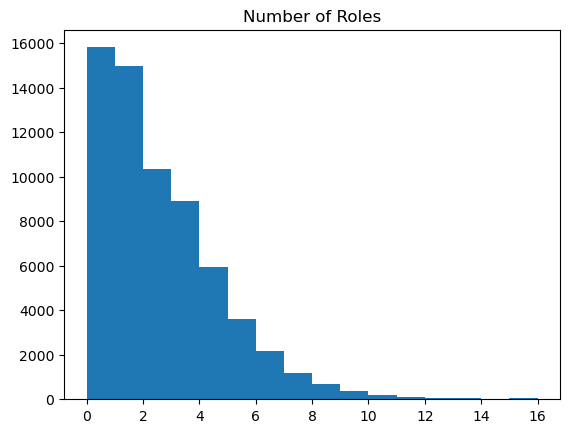

In [11]:
freq_roles = encoded_dfs[ROLE_COLS].sum(axis=1)
plt.hist(freq_roles, freq_roles.max())
plt.title('Number of Roles')
plt.show()

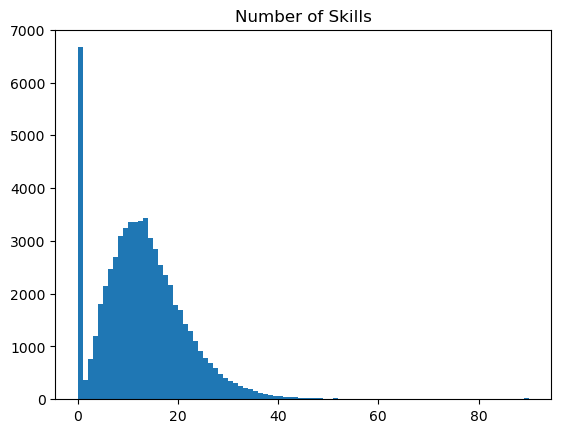

In [12]:
freq_tech = encoded_dfs[TECH_COLS].sum(axis=1)
plt.hist(freq_tech, freq_tech.max())
plt.title('Number of Skills')
plt.show()

In [13]:
# Filter frequencies 
ROLES_RANGE = [1,3]
TECH_RANGE  = [3,30]

In [14]:
# Create masks 
role_mask   = (freq_roles >= ROLES_RANGE[0]) & (freq_roles <= ROLES_RANGE[1])
tech_mask   = (freq_tech >= TECH_RANGE[0])   & (freq_tech <= TECH_RANGE[1])
filter_mask = role_mask & tech_mask

In [15]:
features_df = features_df.loc[filter_mask].copy()
encoded_dfs = encoded_dfs.loc[filter_mask].copy()

In [16]:
# Check the total samples of roles
cleaned_role_sum = encoded_dfs["DevType"].sum(axis=0)
cleaned_role_sum

Academic researcher                               1430
Data or business analyst                          1410
Data scientist or machine learning specialist     1803
Database administrator                            1027
DevOps specialist                                 1985
Developer, QA or test                             1065
Developer, back-end                              13160
Developer, desktop or enterprise applications     4029
Developer, embedded applications or devices       1544
Developer, front-end                              7300
Developer, full-stack                            13990
Developer, game or graphics                        855
Developer, mobile                                 3633
Engineer, data                                    1344
Scientist                                          775
System administrator                              1311
dtype: int64

__________

### Merge & Export data

In [17]:
# Add second level indexing 
features_df.columns = pd.MultiIndex.from_product([['skills_clusters'], 
                                                  features_df.columns])

In [23]:
features_df

skills_clusters                                                 \
       skills_group_0 skills_group_1 skills_group_10 skills_group_11   
0                   0              0               0               0   
1                   0              2               0               0   
5                   0              1               0               0   
7                   2              0               0               0   
8                   0              0               0               0   
...               ...            ...             ...             ...   
64422               3              1               0               0   
64428               0              0               0               0   
64429               1              6               0               0   
64447               0              3               0               0   
64453               0              1               0               0   

                                                                      \
      skills_group_12 skills_group_13 skills_group_14 skills_group_2   
0                   0               0               2              1   
1                   0               0               1              0   
5                   0               0               2              1   
7                   1               0               1              2   
8                   0               0               3              0   
...               ...             ...             ...            ...   
64422               0               0               1              1   
64428               0               1               1              0   
64429               0               0               1              0   
64447               0               0               2              0   
64453               0               0               1              0   

                                                                   \
      skills_group_3 skills_group_4 skills_group_5 skills_group_6   
0                  0              0              7              0   
1                  0              0              0              1   
5                  0              1              0              0   
7                  0              2              0              0   
8                  0              2              0              0   
...              ...            ...            ...            ...   
64422              0              1              1              0   
64428              0              5              0              0   
64429              0              1              1              2   
64447              0              1              3              0   
64453              1              0              1              0   

                                                    
      skills_group_7 skills_group_8 skills_group_9  
0                  0              1              0  
1                  0              0              0  
5                  0              1              0  
7                  0              0              0  
8                  0              0              0  
...              ...            ...            ...  
64422              0              0              0  
64428              0              0              0  
64429              0              0              3  
64447              0              2              0  
64453              0              0              0  

[30939 rows x 15 columns]

In [18]:
features_df.columns

MultiIndex([('skills_clusters',  'skills_group_0'),
            ('skills_clusters',  'skills_group_1'),
            ('skills_clusters', 'skills_group_10'),
            ('skills_clusters', 'skills_group_11'),
            ('skills_clusters', 'skills_group_12'),
            ('skills_clusters', 'skills_group_13'),
            ('skills_clusters', 'skills_group_14'),
            ('skills_clusters',  'skills_group_2'),
            ('skills_clusters',  'skills_group_3'),
            ('skills_clusters',  'skills_group_4'),
            ('skills_clusters',  'skills_group_5'),
            ('skills_clusters',  'skills_group_6'),
            ('skills_clusters',  'skills_group_7'),
            ('skills_clusters',  'skills_group_8'),
            ('skills_clusters',  'skills_group_9')],
           )

In [19]:
# Concatenate
df = pd.concat([encoded_dfs, features_df], axis=1)

In [20]:
print(df.columns.to_list())

[('DevType', 'Academic researcher'), ('DevType', 'Data or business analyst'), ('DevType', 'Data scientist or machine learning specialist'), ('DevType', 'Database administrator'), ('DevType', 'DevOps specialist'), ('DevType', 'Developer, QA or test'), ('DevType', 'Developer, back-end'), ('DevType', 'Developer, desktop or enterprise applications'), ('DevType', 'Developer, embedded applications or devices'), ('DevType', 'Developer, front-end'), ('DevType', 'Developer, full-stack'), ('DevType', 'Developer, game or graphics'), ('DevType', 'Developer, mobile'), ('DevType', 'Engineer, data'), ('DevType', 'Scientist'), ('DevType', 'System administrator'), ('DatabaseWorkedWith', 'Cassandra'), ('DatabaseWorkedWith', 'Couchbase'), ('DatabaseWorkedWith', 'DynamoDB'), ('DatabaseWorkedWith', 'Elasticsearch'), ('DatabaseWorkedWith', 'Firebase'), ('DatabaseWorkedWith', 'IBM DB2'), ('DatabaseWorkedWith', 'MariaDB'), ('DatabaseWorkedWith', 'Microsoft SQL Server'), ('DatabaseWorkedWith', 'MongoDB'), ('Da

In [21]:
# Export 
df.to_pickle(EXPORT_PATH)